In [1]:
import sys
import os

dir = os.getcwd()

# Loop to move up the directory tree until we find FinModels
while os.path.basename(dir) != 'FinModels':
    dir = os.path.dirname(dir)  # Move up one level

print(dir)

sys.path.append(dir)
# Doda dostop tudi do drugih modelov

c:\Users\lavse\Desktop\FMF\FinModels


In [2]:
from Stock_Generation.StocksGeneration import generate_n_stock_data
from PrepareData import prepare_data
from FitNormalDistribution import fit_normal_distribution
import ShrinkageMethods
from ModelCore import*
from Visualise import*
from ClusteringMethod import*
from ClusteringMethod import*
from BackTesting import*

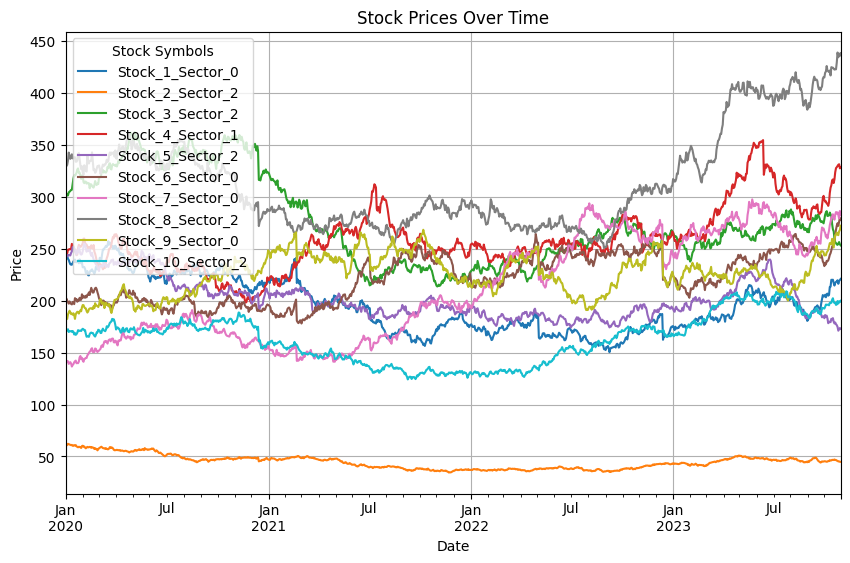

In [25]:
df_prices = generate_n_stock_data(n_stocks=10, n_days=1000, random_seed=2)

visualize_generated_stocks(df_prices=df_prices)

In [26]:
df_weekly_log_returns, df_weekly_prices = prepare_data(df_prices=df_prices)

m, S = fit_normal_distribution(df_weekly_log_returns, df_weekly_prices)

m_js_shr, S_js = ShrinkageMethods.james_stein_estimator(df_weekly_log_returns, df_weekly_prices, horizon=20, tau=1)

m_shr, S_shr = ShrinkageMethods.shrinkage_metod(df_weekly_log_returns, df_weekly_prices, horizon=20, tau=1)

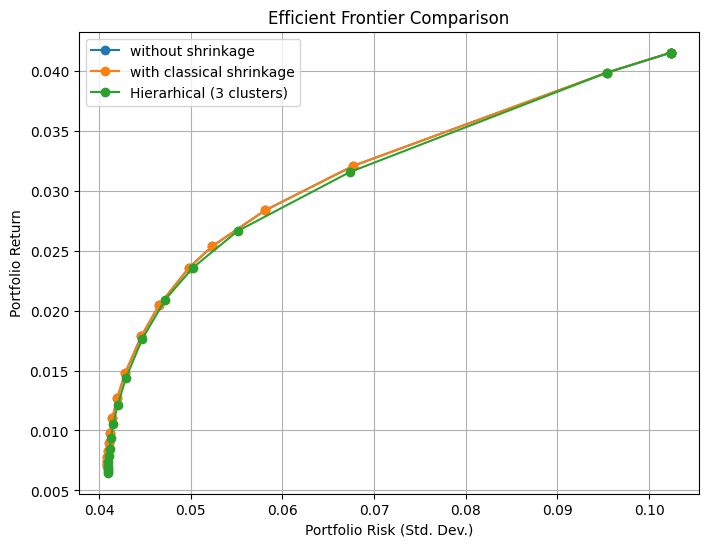

In [27]:
deltas = np.logspace(start=-1, stop=1.5, num=20)[::-1]

df_without_shrinkage = make_df(deltas, model=model_2_13, model_params={"S": S, "m": m, "delta": None})
df_normal_shrinkage = make_df(deltas, model=model_2_13, model_params={"S": S, "m": m, "delta": None})
df_3_clusters = make_df(deltas, model=hierarchical_optimization, 
                        model_params={
    "model": model_2_13, "S": S, "m": m, "delta": None, 
    "num_clusters": 3, "use_abs_corr": True
})


models = [[df_without_shrinkage, "without shrinkage"],
          [df_normal_shrinkage, "with classical shrinkage"], 
          [df_3_clusters, "Hierarhical (3 clusters)"]]

display_results(models)

In [28]:
model_params = {"model": model_2_13, "S": S, "m": m, "delta": 0, "num_clusters": 3, "use_abs_corr": True}
final_ammount, _, _, _ = backtest_markowitz(df_prices, hierarchical_optimization, model_params, window_size=200)
final_ammount

np.float64(1.3317977476078509)

In [29]:
final = backtest_random_portfolios(df_prices, 100000)
final

np.float64(1.1922378833930953)